Introducción:
Los Juegos Olímpicos son un evento multideportivo internacional que se celebra cada cuatro años y en el que participan miles de atletas de todo el mundo en diversas competiciones deportivas. Los Juegos Olímpicos son uno de los eventos deportivos más importantes y prestigiosos a nivel mundial, y promueven la unidad, la amistad y el juego. 
El símbolo icónico de los Juegos Olímpicos son los cinco anillos entrelazados, que representan los cinco continentes (África, América, Asia, Europa y Oceanía). Los colores de los anillos (azul, amarillo, negro, verde y rojo) se eligieron porque la bandera de cada nación contiene al menos uno de estos colores.
Medallas olímpicas: se otorgan medallas de oro, plata y bronce a los tres mejores atletas o equipos de cada evento.

DataSet: se obtiene un Dataset de los juegos olímpicos con el detalle de los deportistas, si ganaron alguna medalla y en qué tipo de juegos.
Se busca predecir a futuro que probabilidad tiene cada deportista de ganar una medalla.

Ideas para análisis o predicciones:
1) Predecir la medalla: Utilizando las variables de altura, peso, edad y deporte crear un modelo que intente predecir si un atleta ganará una medalla.
2) Performance de atletas por edad: Analizar si hay una edad "óptima" para obtener una medalla en ciertos deportes.
3) Análisis de países: Analizar el rendimiento de los países en los Juegos Olímpicos para ver si ciertos países destacan más en determinados deportes.

In [11]:
# Importar librerias
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Definir el directorio de trabajo a la ruta deseada
nueva_ruta = 'C:\\Users\\Usuario\\Desktop\\pc escrittorio\\Mel\\Cursos\\ciencia de datos_CODERHOUSE\\1.Data Science_2024\\Proyecto-Data-Science-I'
os.chdir(nueva_ruta)

# Levantar el archivo 
df = pd.read_csv("dataset_olympics.csv",sep = ',')
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [15]:
# Explorar un poco el DataFrame
print('Cantidad de filas: ',df.shape[0]) # atributo shape elemento 0 es fila
print('Cantidad de columnas: ',df.shape[1]) # por defecto el 1 es columna
df["Medal"].value_counts()
max_ID = df["ID"].max()
print("ID máximo: ", max_ID) # ID máximo:  35.658

# Revisión de datos nulos




Cantidad de filas:  70000
Cantidad de columnas:  15
ID máximo:  35658


In [17]:
# Renombramos las columnas

nombres_columnas = {"ID": "ID_persona", 
                    "Name":"Nombre", 
                    "Sex":"Sexo",
                    "Age":"Años",
                    "Height":"Altura",
                    "Weight":"Peso",
                    "Team":"Equipo",
                    "NOC":"Id equipo",
                    "Games":"Juegos",
                    "Year":"Año Juego",
                    "Season":"Tipo de juego",
                    "City":"Ciudad",
                    "Sport":"Deporte",
                    "Event":"Evento",
                    "Medal":"Medalla"}

                    


In [18]:
df = df.rename(columns = nombres_columnas) 
df.head()

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [19]:
print(df.columns)


Index(['ID_persona', 'Nombre', 'Sexo', 'Años', 'Altura', 'Peso', 'Equipo',
       'Id equipo', 'Juegos', 'Año Juego', 'Tipo de juego', 'Ciudad',
       'Deporte', 'Evento', 'Medalla'],
      dtype='object')


In [20]:
# ANALIZANDO DATOS NULOS
# # print(df.info())
print('Detalle de Nulos:')
print(df.isnull().sum())

Detalle de Nulos:
ID_persona           0
Nombre               0
Sexo                 0
Años              2732
Altura           16254
Peso             17101
Equipo               0
Id equipo            0
Juegos               0
Año Juego            0
Tipo de juego        0
Ciudad               0
Deporte              0
Evento               0
Medalla          60310
dtype: int64


In [21]:
# Usando el método describe() para explorar el dataset:
print(df.describe())

         ID_persona          Años        Altura          Peso     Año Juego
count  70000.000000  67268.000000  53746.000000  52899.000000  70000.000000
mean   18081.846986     25.644645    175.505303     70.900216   1977.766457
std    10235.613253      6.485239     10.384203     14.217489     30.103306
min        1.000000     11.000000    127.000000     25.000000   1896.000000
25%     9325.750000     21.000000    168.000000     61.000000   1960.000000
50%    18032.000000     25.000000    175.000000     70.000000   1984.000000
75%    26978.000000     28.000000    183.000000     79.000000   2002.000000
max    35658.000000     88.000000    223.000000    214.000000   2016.000000


In [22]:
nun_missing = (df[['Años','Altura','Peso','Medalla']] == 0).sum()
print(nun_missing)

Años       0
Altura     0
Peso       0
Medalla    0
dtype: int64


In [23]:
# Para darle tratamiento como nulo, reemplazamos los '0' con 'nan'
df['Altura'] = df['Altura'].replace( '', np.nan)
# Cuántos nulos me quedaron en cada variable?
print('Cantidad de nulos:')
print(df.isnull().sum())

Cantidad de nulos:
ID_persona           0
Nombre               0
Sexo                 0
Años              2732
Altura           16254
Peso             17101
Equipo               0
Id equipo            0
Juegos               0
Año Juego            0
Tipo de juego        0
Ciudad               0
Deporte              0
Evento               0
Medalla          60310
dtype: int64


In [24]:
# Se reemplazan los valores de las columnas Años, Altura y Peso por el promedio. Se elije esa estrategia por contar con muchos datos ausentes
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number])

# Calcular el promedio solo en las columnas numéricas
promedios = columnas_numericas.mean()

# Reemplazar los NaN por el promedio de cada columna numérica
df[columnas_numericas.columns] = columnas_numericas.fillna(promedios)


In [26]:
# Se verifica que no queden nulos
print('Detalle de Nulos:')
print(df.isnull().sum())

Detalle de Nulos:
ID_persona           0
Nombre               0
Sexo                 0
Años                 0
Altura               0
Peso                 0
Equipo               0
Id equipo            0
Juegos               0
Año Juego            0
Tipo de juego        0
Ciudad               0
Deporte              0
Evento               0
Medalla          60310
dtype: int64


In [27]:
# Convertir la columna 'Años' a tipo entero
df['Años'] = df['Años'].astype(int)
df['Altura'] = df['Altura'].astype(int)
df['Peso'] = df['Peso'].astype(int)

# Verificar el cambio
print(df['Años'].dtype)  # Debería mostrar 'int64'
df

int64


,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19,175,70,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19,175,70,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26,170,65,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30,170,65,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


In [28]:
# se reemplaza en columna "Medalla" los NaN por "Sin Medalla"
df['Medalla'] = df['Medalla'].fillna( 'Sin Medalla')

In [29]:
df['Medalla'] = df['Medalla'].replace('Sin Medalla', "No obtuvo")


In [30]:
reemplazos_medallas = {
    'Bronze':'Bronce',
    'Silver':'Plata',
    'Gold':'Oro'
}
df['Medalla'] = df['Medalla'].replace(reemplazos_medallas)
df.head(3)

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo


In [31]:
df

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo
3,4,Edgar Lindenau Aabye,M,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Oro
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No obtuvo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19,175,70,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No obtuvo
69996,35656,Stuart Fitzsimmons,M,19,175,70,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,No obtuvo
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26,170,65,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",No obtuvo
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30,170,65,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",No obtuvo


In [66]:
print(df.groupby('Medalla').size())


Medalla
Bronce        3208
No obtuvo    60310
Oro           3292
Plata         3190
dtype: int64


In [67]:
# Crear un mapeo de los valores de la columna 'Medalla'
mapeo = {
    'No obtuvo': 0,
    'Bronce': 1,
    'Plata': 1,
    'Oro': 1
}

# Incorporar la nueva columna usando map()
df['Obtuvo_medalla'] = df['Medalla'].map(mapeo)

print(df)


       ID_persona                          Nombre Sexo  Años  Altura  Peso  \
0               1                       A Dijiang    M    24     180    80   
1               2                        A Lamusi    M    23     170    60   
2               3             Gunnar Nielsen Aaby    M    24     175    70   
3               4            Edgar Lindenau Aabye    M    34     175    70   
4               5        Christine Jacoba Aaftink    F    21     185    82   
...           ...                             ...  ...   ...     ...   ...   
69995       35656              Stuart Fitzsimmons    M    19     175    70   
69996       35656              Stuart Fitzsimmons    M    19     175    70   
69997       35657  David Thomas "Dave" Fitzsimons    M    26     170    65   
69998       35657  David Thomas "Dave" Fitzsimons    M    30     170    65   
69999       35658                    Marek Fiurek    M    23     180    68   

               Equipo Id equipo       Juegos  Año Juego Tipo de

In [71]:
df.head(5)

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla,Obtuvo_medalla,Podio,Rango_Edad
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo,0,0,<=25
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo,0,0,<=25
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo,0,0,<=25
3,4,Edgar Lindenau Aabye,M,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Oro,1,1,26-35
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0,<=25


In [64]:
# Reemplazar NaN por 0 en la columna 'Obtuvo_medalla'
# df['Obtuvo_medalla'] = df['Obtuvo_medalla'].fillna(0)

# Convertir 'Obtuvo_medalla' en una categoría
df['Obtuvo_medalla'] = df['Obtuvo_medalla'].astype('category')

# Verificar los valores únicos después de la corrección
print(df['Obtuvo_medalla'].unique())


[0.0, NaN]
Categories (1, float64): [0.0]


In [72]:
# Convertir 'Obtuvo_medalla' en una columna categórica
df['Obtuvo_medalla'] = df['Obtuvo_medalla'].astype('category')

# Verificar nuevamente
print(df['Obtuvo_medalla'].unique())


[0, 1]
Categories (2, int64): [0, 1]


In [73]:
# Crear un mapeo de los valores de la columna 'Medalla' para tipo de medalla según es Bronce, Oro o Plata
mapeo_podio = {
    'No obtuvo': 0,
    'Bronce': 3,
    'Plata': 2,
    'Oro': 1
}

# Incorporar la nueva columna usando map()
df['Podio'] = df['Medalla'].map(mapeo_podio)

df.head(15)

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla,Obtuvo_medalla,Podio,Rango_Edad
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo,0,0,<=25
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo,0,0,<=25
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo,0,0,<=25
3,4,Edgar Lindenau Aabye,M,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Oro,1,1,26-35
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0,<=25
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No obtuvo,0,0,<=25
6,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0,<=25
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No obtuvo,0,0,<=25
8,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0,26-35
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No obtuvo,0,0,26-35


In [74]:
# Validar datos de Edad minimo, máximo y que no haya nulos
# Mostrar estadísticas de la columna 'Años' (mínima y máxima)
print(f"Edad mínima: {df['Años'].min()}")
print(f"Edad máxima: {df['Años'].max()}")

# Validar si hay valores nulos o vacíos en la columna 'Años'
nulos = df['Años'].isna().sum()
print(f"Valores nulos en 'Años': {nulos}")

# Validar si hay valores iguales a 0 en la columna 'Años'
cero = (df['Años'] == 0).sum()
print(f"Valores igual a 0 en 'Años': {cero}")

# Mostrar los registros que tienen valores nulos o 0 en 'Años'
df[df['Años'].isna() | (df['Años'] == 0)]


Edad mínima: 11
Edad máxima: 88
Valores nulos en 'Años': 0
Valores igual a 0 en 'Años': 0


,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla,Obtuvo_medalla,Podio,Rango_Edad


In [75]:
# Filtrar atletas mayores de 60 años
atletas_mayores_60 = df[df['Años'] > 60]

# Contar el número de atletas mayores de 60 años
num_atletas_mayores_60 = len(atletas_mayores_60)

# Mostrar el número y algunos ejemplos de atletas mayores de 60 años
print(f"Número de atletas mayores de 60 años: {num_atletas_mayores_60}")
print(atletas_mayores_60[['Nombre', 'Años']].head())


Número de atletas mayores de 60 años: 144
                  Nombre  Años
2392        Olof Ahlberg    71
3944   Emilio lava Sautu    63
7433  Robert Day Andrews    75
7496     Ferdinand Andri    65
7497     Ferdinand Andri    65


In [76]:
# Crear una nueva columna 'Rango_Edad' con los rangos de edad
df['Rango_Edad'] = pd.cut(df['Años'], bins=[0, 25, 35, 45, float('inf')], labels=['<=25', '26-35', '36-45', '>=46'], right=True)

# Verificar si se ha creado correctamente
print(df[['Años', 'Rango_Edad']].head())


   Años Rango_Edad
0    24       <=25
1    23       <=25
2    24       <=25
3    34      26-35
4    21       <=25


In [38]:
# Filtrar los atletas que obtuvieron medalla
medallas_por_edad = df[df['Obtuvo_medalla'] == 1]['Rango_Edad'].value_counts().sort_index()

# Verificar el conteo de medallas
print(medallas_por_edad)






Rango_Edad
<=25     0
26-35    0
36-45    0
>=46     0
Name: count, dtype: int64


In [77]:
# Verificar los valores únicos en la columna 'Años'
print(df['Años'].unique())


[24 23 34 21 25 27 31 33 18 26 22 30 32 28 54 20 17 43 47 29 41 45 49 53
 57 19 38 35 16 37 15 42 46 40 36 14 39 48 52 44 55 50 71 63 51 58 13 60
 75 65 56 64 68 84 12 72 59 61 70 74 62 67 69 73 66 11 76 88]


In [78]:
# Verificar los valores únicos en 'Rango_Edad'
print(df['Rango_Edad'].value_counts())
# Revisar si hay datos nulos en la columna 'Años'
print(df['Años'].isnull().sum())
# Verificar el tipo de datos en la columna 'Años'
print(df['Años'].dtype)





Rango_Edad
<=25     41359
26-35    24062
36-45     3584
>=46       995
Name: count, dtype: int64
0
int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24720\2185427595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rango_edad_counts.index, y=rango_edad_counts.values, palette="Blues_d")


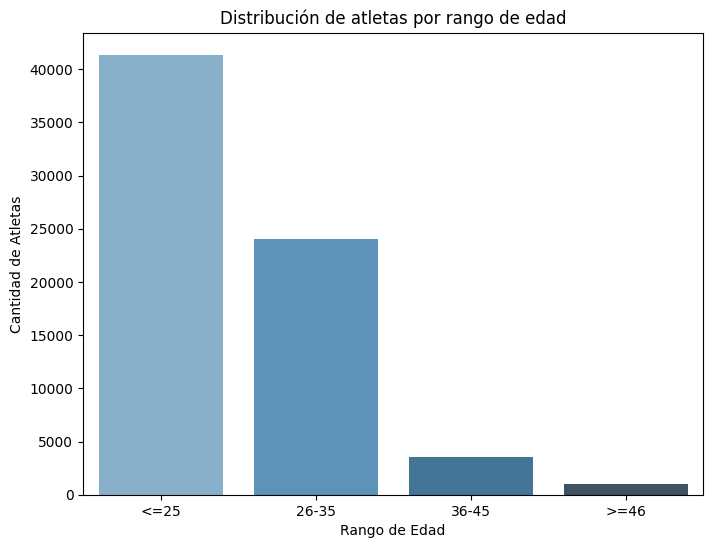

In [79]:
# Contar la cantidad de atletas por rango de edad
rango_edad_counts = df['Rango_Edad'].value_counts().sort_index()

# Crear el barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=rango_edad_counts.index, y=rango_edad_counts.values, palette="Blues_d")
plt.title("Distribución de atletas por rango de edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Cantidad de Atletas")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24720\3458313181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obtuvo_medalla', y='Rango_Edad', data=df, palette='Set2')


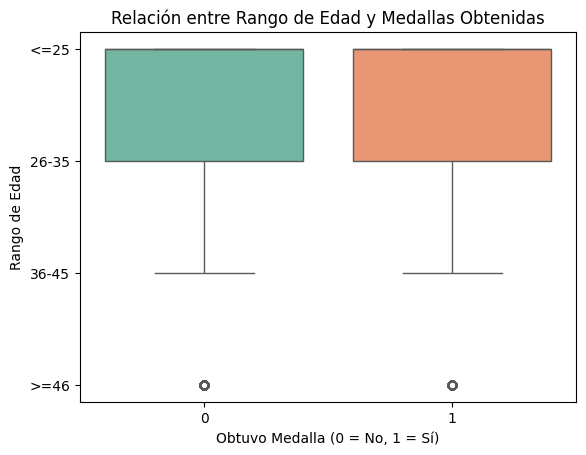

In [84]:
# Crear el boxplot para visualizar la relación entre rango de edad y obtención de medallas
sns.boxplot(x='Obtuvo_medalla', y='Rango_Edad', data=df, palette='Set2')
plt.title('Relación entre Rango de Edad y Medallas Obtenidas')
plt.xlabel('Obtuvo Medalla (0 = No, 1 = Sí)')
plt.ylabel('Rango de Edad')
plt.show()


In [80]:
df.columns
df

,ID_persona,Nombre,Sexo,Años,Altura,Peso,Equipo,Id equipo,Juegos,Año Juego,Tipo de juego,Ciudad,Deporte,Evento,Medalla,Obtuvo_medalla,Podio,Rango_Edad
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No obtuvo,0,0,<=25
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No obtuvo,0,0,<=25
2,3,Gunnar Nielsen Aaby,M,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No obtuvo,0,0,<=25
3,4,Edgar Lindenau Aabye,M,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Oro,1,1,26-35
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No obtuvo,0,0,<=25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19,175,70,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No obtuvo,0,0,<=25
69996,35656,Stuart Fitzsimmons,M,19,175,70,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,No obtuvo,0,0,<=25
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26,170,65,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",No obtuvo,0,0,26-35
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30,170,65,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",No obtuvo,0,0,26-35


In [81]:
# Reemplazar NaN por 0 en la columna 'Obtuvo_medalla'
df['Obtuvo_medalla'] = df['Obtuvo_medalla'].fillna(0)

# Convertir 'Obtuvo_medalla' a entero para evitar que sea float
df['Obtuvo_medalla'] = df['Obtuvo_medalla'].astype(int)

# Convertir la columna a categórica
df['Obtuvo_medalla'] = df['Obtuvo_medalla'].astype('category')

# Verificar los valores únicos después de la corrección
print(df['Obtuvo_medalla'].unique())



[0, 1]
Categories (2, int64): [0, 1]


In [82]:
# Verificar cuántos atletas tienen 0 y cuántos tienen 1 en la columna 'Obtuvo_medalla'
print(df['Obtuvo_medalla'].value_counts())

Obtuvo_medalla
0    60310
1     9690
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24720\3516747300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Obtuvo_medalla', y='Altura', data=df, palette='Set2')


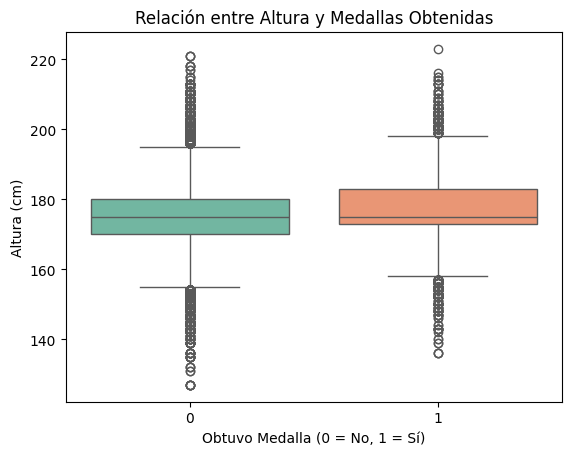

In [83]:
# Crear el boxplot para visualizar la relación entre altura y obtención de medallas
sns.boxplot(x='Obtuvo_medalla', y='Altura', data=df, palette='Set2')
plt.title('Relación entre Altura y Medallas Obtenidas')
plt.xlabel('Obtuvo Medalla (0 = No, 1 = Sí)')
plt.ylabel('Altura (cm)')
plt.show()